<a href="https://colab.research.google.com/github/Jaya9yellow/Stress-detection-using-EEG/blob/main/Stress_detection_using_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
data = pd.read_csv("/content/emotions.csv")

In [52]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [54]:
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [55]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

<ipython-input-56-2a29c1a296f8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


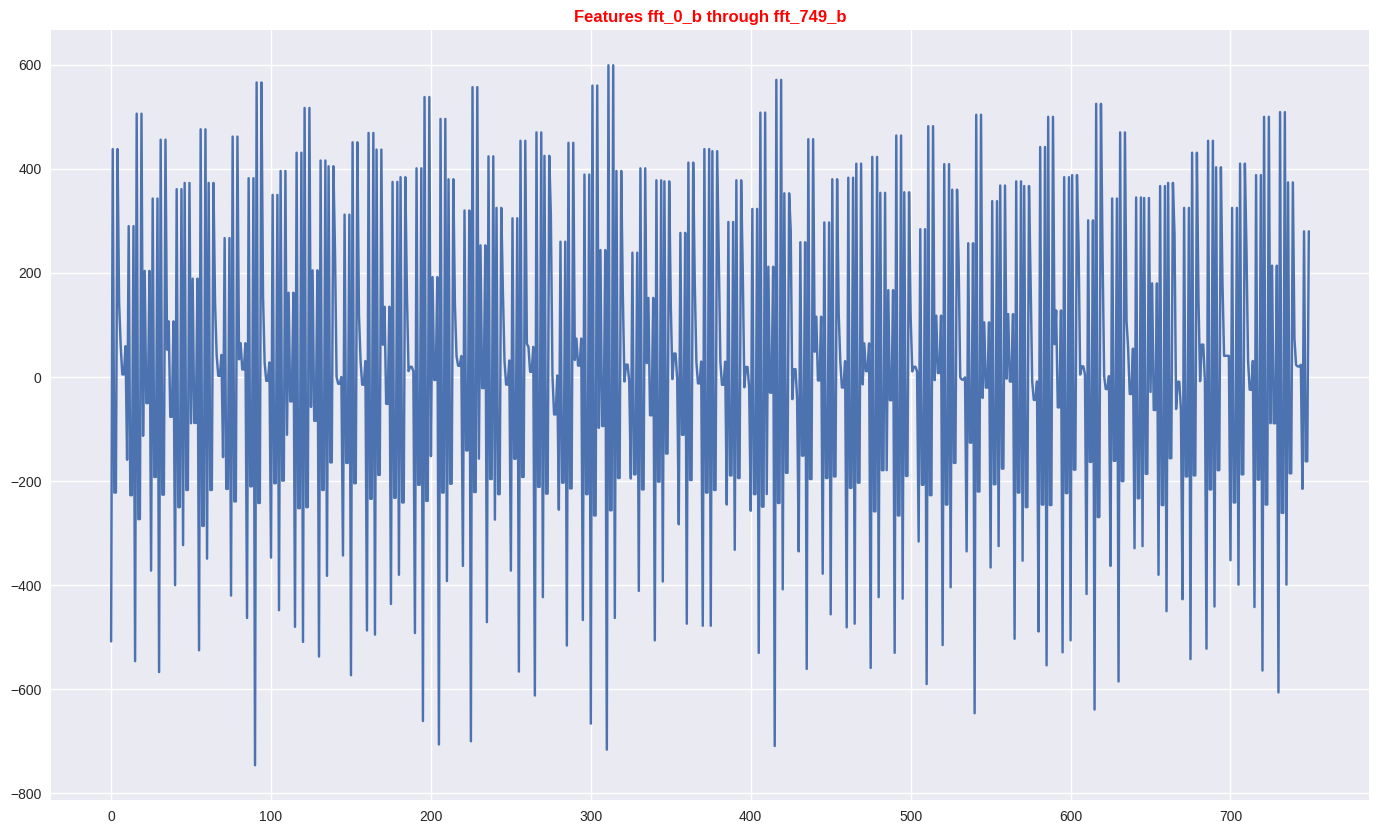

In [56]:
plt.style.use('seaborn')
plt.figure(figsize=(17,10))
plt.plot(range(len(sample)),sample)
plt.title("Features fft_0_b through fft_749_b",weight='bold',color='red')
plt.show()

<ipython-input-57-d925b09d13a3>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


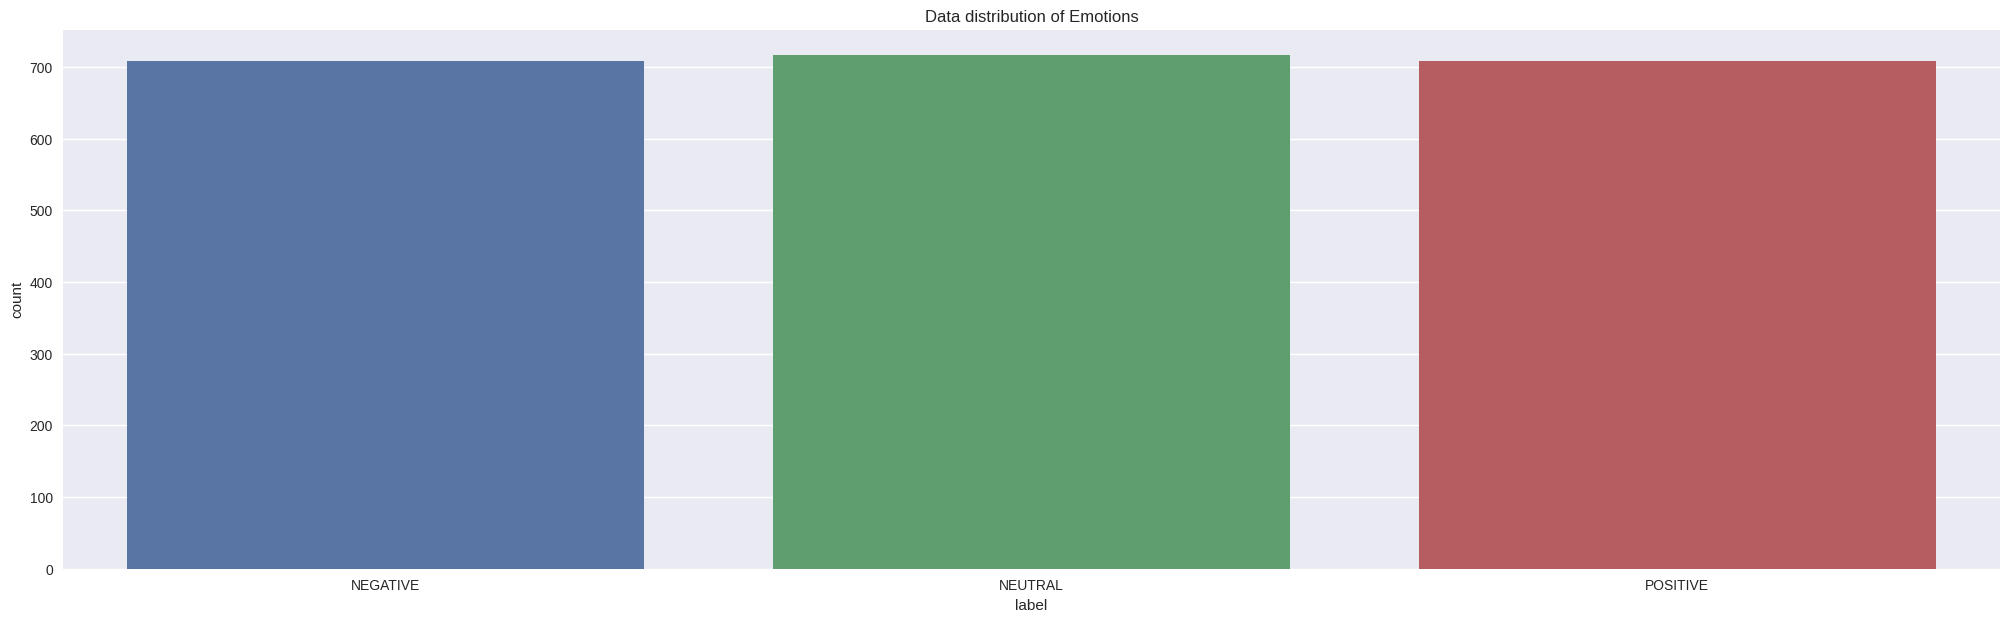

In [57]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('seaborn')
sns.countplot(x='label', data=data)
plt.show()

In [58]:
#Separating Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

<ipython-input-59-cbf03869dc82>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


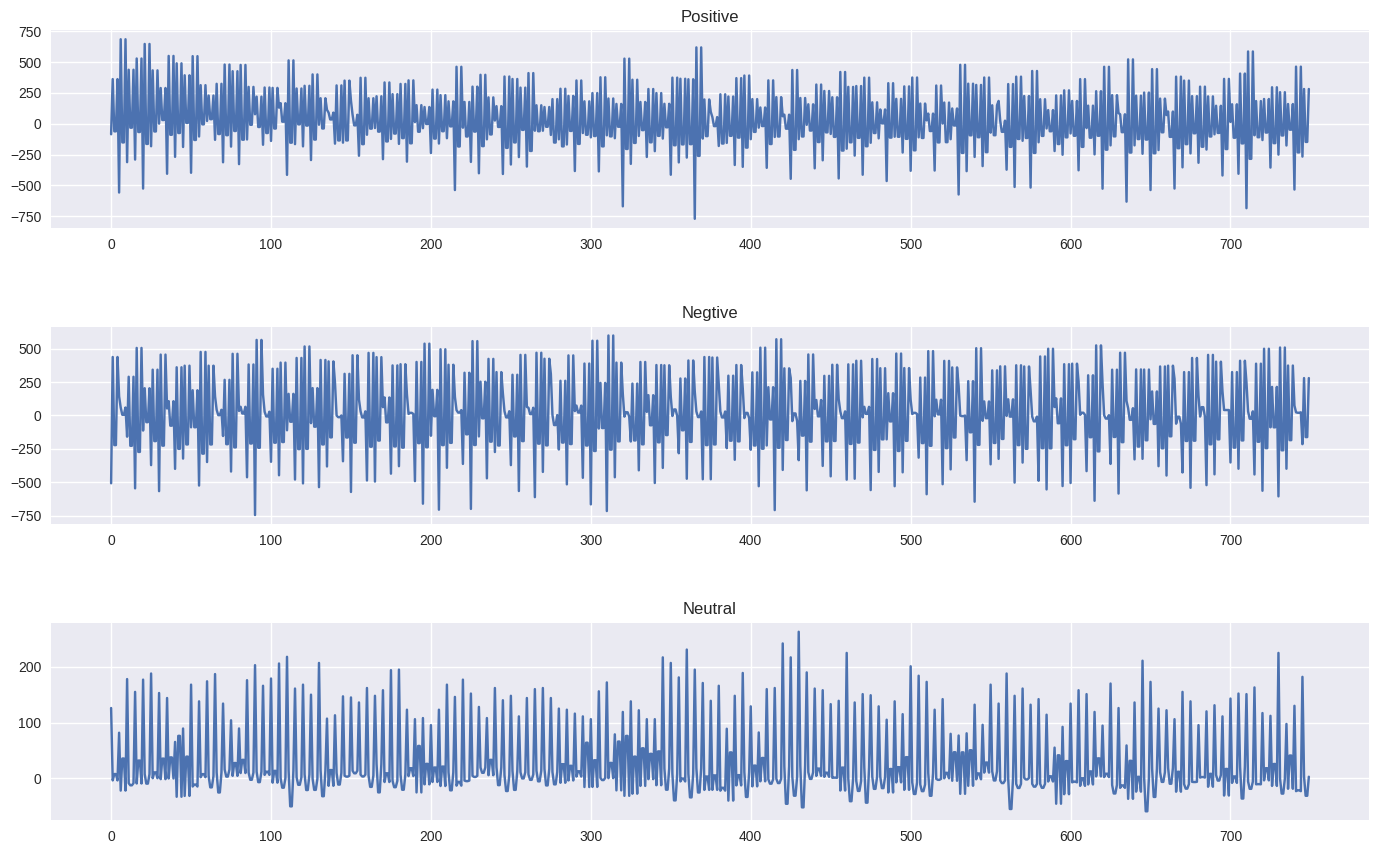

In [59]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5)  # Ajustement de l'espacement
axs[0].plot(range(len(sample_pos)), sample_pos)
axs[0].set_title('Positive')
axs[1].plot(range(len(sample_neg)), sample_neg)
axs[1].set_title('Negtive')
axs[2].plot(range(len(sample_neu)), sample_neu)
axs[2].set_title('Neutral')
plt.show()

In [60]:
classes=["NEUTRAL","NEGATIVE","POSITIVE"]

In [72]:
# One hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model.

from sklearn.preprocessing import OneHotEncoder
y=pd.get_dummies(data.label)
print(y.head(5))
X=data.drop('label',axis=1).copy()
X.head(5)

   NEGATIVE  NEUTRAL  POSITIVE
0         1        0         0
1         0        1         0
2         0        0         1
3         0        0         1
4         0        1         0


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [62]:
y=y.to_numpy()
print(type(y))
y

<class 'numpy.ndarray'>


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [63]:
# spliting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1492, 2548)
(640, 2548)
(1492, 3)
(640, 3)


In [64]:
from sklearn import preprocessing
x=X_train
z=X_test
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
z_scaled=min_max_scaler.fit_transform(z)
dft=pd.DataFrame(z_scaled)
df=pd.DataFrame(x_scaled)
df
dft

,0,1,2,3,4,5,6,7,8,9,...,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547
0,0.444574,0.757167,0.594793,0.204288,0.905493,0.380189,0.513376,0.337727,0.365889,0.676970,...,0.514744,0.342963,0.240086,0.240086,0.342963,0.507930,0.351484,0.237865,0.237865,0.351484
1,0.713901,0.878583,0.614347,0.388398,0.926494,0.456241,0.522611,0.350235,0.367491,0.589212,...,0.606047,0.335967,0.211780,0.211780,0.335967,0.551101,0.317320,0.235929,0.235929,0.317320
2,0.782960,0.969646,0.611097,0.413199,0.953958,0.455443,0.539490,0.348205,0.370279,0.629333,...,0.559070,0.303021,0.235696,0.235696,0.303021,0.539648,0.315157,0.236864,0.236864,0.315157
3,0.734529,0.905565,0.614040,0.404792,0.942649,0.437663,0.395223,0.347545,0.365575,0.636364,...,0.593023,0.325844,0.245997,0.245997,0.325844,0.563436,0.309389,0.254633,0.254633,0.309389
4,0.738117,0.912310,0.612753,0.400168,0.930533,0.380624,0.329936,0.350523,0.346446,0.652364,...,0.576279,0.316049,0.229220,0.229220,0.316049,0.547137,0.332146,0.230306,0.230306,0.332146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.628700,0.821248,0.529736,0.354771,0.969305,0.436212,0.471401,0.336061,0.376829,0.645212,...,0.665581,0.175309,0.297297,0.297297,0.175309,0.500044,0.380492,0.204701,0.204701,0.380492
636,0.592825,0.861720,0.534641,0.348886,0.932956,0.634978,0.426338,0.356288,0.476655,0.610788,...,0.438605,0.387407,0.206986,0.206986,0.387407,0.428194,0.424088,0.203514,0.203514,0.424088
637,0.539462,0.871838,0.607787,0.304077,0.934572,0.432075,0.433439,0.346871,0.364146,0.638909,...,0.493581,0.286502,0.241719,0.241719,0.286502,0.503921,0.321374,0.228663,0.228663,0.321374
638,0.501525,0.876897,0.616002,0.242203,0.920840,0.396517,0.366879,0.352121,0.365645,0.607394,...,0.573023,0.314650,0.200612,0.200612,0.314650,0.498062,0.286684,0.217983,0.217983,0.286684


In [65]:
print(X_train.shape)
print(X_test.shape)

temp_X = tf.expand_dims(df,2)
temp_Z=tf.expand_dims(dft,2)
print(temp_X.shape)
print(temp_Z.shape)

(1492, 2548)
(640, 2548)
(1492, 2548, 1)
(640, 2548, 1)


In [66]:
ytrain_classes=[np.argmax(element) for element in y_train]
print(ytrain_classes[:5])
ytest_classes=[np.argmax(element) for element in y_test]
print(ytest_classes[:5])

[1, 1, 1, 1, 1]
[2, 1, 1, 1, 1]


In [67]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv1D(16, 10, activation='relu',input_shape=(2548,1)))
model.add(layers.Conv1D(16, 10, activation='relu'))
# model.add(layers.Conv1D(16, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2539, 16)          176       
                                                                 
 conv1d_3 (Conv1D)           (None, 2530, 16)          2576      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1265, 16)          0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 20240)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               2024100   
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                      

In [68]:
model.fit(temp_X,y_train,epochs=15,batch_size=32)

Epoch 1/15
47/47 [==============================] - 8s 159ms/step - loss: 0.8065 - accuracy: 0.6005
Epoch 2/15
47/47 [==============================] - 5s 109ms/step - loss: 0.4680 - accuracy: 0.8184
Epoch 3/15
47/47 [==============================] - 7s 143ms/step - loss: 0.2920 - accuracy: 0.8934
Epoch 4/15
47/47 [==============================] - 6s 134ms/step - loss: 0.2466 - accuracy: 0.9129
Epoch 5/15
47/47 [==============================] - 5s 110ms/step - loss: 0.2325 - accuracy: 0.9088
Epoch 6/15
47/47 [==============================] - 9s 187ms/step - loss: 0.2030 - accuracy: 0.9283
Epoch 7/15
47/47 [==============================] - 5s 113ms/step - loss: 0.1513 - accuracy: 0.9564
Epoch 8/15
47/47 [==============================] - 7s 156ms/step - loss: 0.1399 - accuracy: 0.9517
Epoch 9/15
47/47 [==============================] - 5s 112ms/step - loss: 0.1172 - accuracy: 0.9672
Epoch 10/15
47/47 [==============================] - 6s 135ms/step - loss: 0.0984 - accuracy: 0.9718

In [69]:
y_pred=model.predict(temp_Z)
y_pred

20/20 [==============================] - 1s 34ms/step


array([[1.0418787e-06, 3.2174638e-01, 6.7825258e-01],
       [8.6760951e-07, 8.3678573e-01, 1.6321339e-01],
       [1.6109021e-06, 6.3433444e-01, 3.6566395e-01],
       ...,
       [1.8660869e-06, 4.0828136e-01, 5.9171677e-01],
       [5.8134178e-06, 5.3655744e-01, 4.6343675e-01],
       [9.8915518e-07, 7.9231352e-01, 2.0768559e-01]], dtype=float32)

In [70]:
ypred_classes=[np.argmax(element) for element in y_pred]
ypred_classes[:20]

[2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1]

In [71]:
print("Classification Report:\n" , classification_report(ytest_classes,ypred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       222
           1       0.89      0.81      0.85       228
           2       0.75      0.73      0.74       190

    accuracy                           0.85       640
   macro avg       0.84      0.84      0.84       640
weighted avg       0.85      0.85      0.84       640

